In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import math
import itertools    
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor

In [2]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
sns.set_style("whitegrid")

In [3]:
def read_cs_md(data):
 confd = { 'HA': { },
          'CA': { },
          'CB': { },
          'C': { },
          'H': { },
          'HA2':{ },
          'HA3':{ },
          'N': { }}
 for lines in open(data, "r").readlines():
        riga=lines.strip().split(",")
        #riga=lines.strip().split(" ")
        # key dictionary
        key=riga[0]
        key2=riga[1]
        confd[key2][key]=[] 
        timeseries=np.asarray(riga[2:]).astype(float)
        confd[key2][key]=timeseries
 return(confd)

def read_exp_cs(data):
 confd = { 'HA': { },
          'CA': { },
          'CB': { },
          'C': { },
          'H': { },
          'HA2':{ },
          'HA3':{ },
          'N': { }}
 for lines in open(data, "r").readlines():
        #riga=lines.strip().split(",")
        riga=lines.strip().split(" ")
        # key dictionary
        key=riga[0]
        key2=riga[1]
        confd[key2][key]=[]
        confd[key2][key] += map(float, [float(riga[2])])
 return(confd)

def add_md_data(data,dict,key):
  dict[key]={}
  for lines in open(data, "r").readlines():
        riga=lines.strip().split(",")
        #riga=lines.strip().split(" ")
        key2=riga[0]
        timeseries=np.asarray(riga[1:]).astype(float)
        dict[key][key2]=[]
        dict[key][key2]=(timeseries)
  return(dict)

def add_exp_data(data,dict,key):
  dict[key]={}
  for lines in open(data, "r").readlines():
        #riga=lines.strip().split(",")
        riga=lines.strip().split(" ")
        key2=riga[0]
        dict[key][key2]=[]
        dict[key][key2] += map(float, [float(riga[1])])
  return(dict)



In [11]:
#outdir=sys.argv[1]
#datadir=sys.argv[2]
#expdatadir=sys.argv[3]
outdir='/Users/paulrobustelli/Desktop/Manuscript_Files/asyn_4.2/Revisions/NMR_Data/DESRES/NewFigures'
expdatadir='/Users/paulrobustelli/Desktop/Manuscript_Files/asyn_4.2/Revisions/NMR_Data/DESRES/Exp_Data'
MDdatadir='/Users/paulrobustelli/Desktop/Manuscript_Files/asyn_4.2/Revisions/NMR_Data/DESRES/MD_Data'


if not os.path.exists(outdir):
    os.makedirs(outdir)


In [12]:
expdata=read_exp_cs(expdatadir+'/CS.exp.dat')
randomcoil=read_exp_cs(expdatadir+'/asyn.randomcoil.all.dat')
apodata=read_exp_cs(MDdatadir+'/apo.chemical_shifts.ave.dat')
lig41data=read_exp_cs(MDdatadir+'/lig41.chemical_shifts.ave.dat')
lig47data=read_exp_cs(MDdatadir+'/lig47.chemical_shifts.ave.dat')


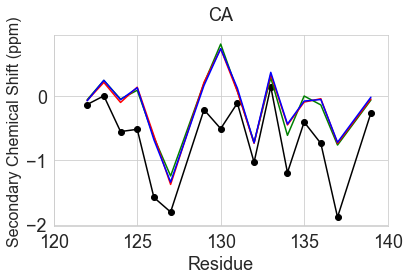

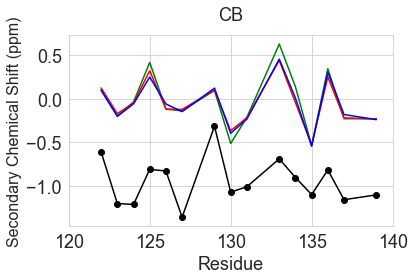

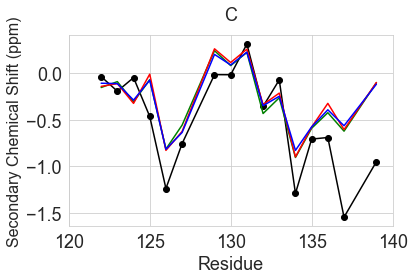

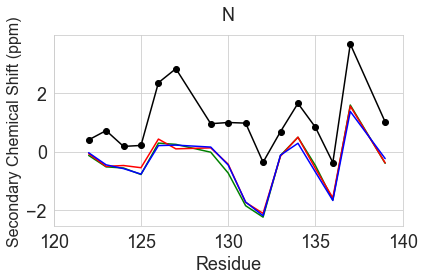

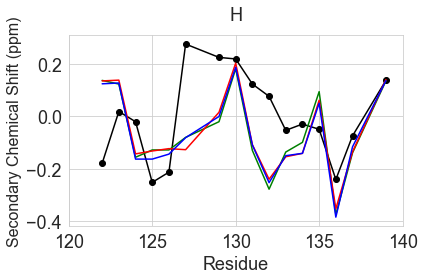

<Figure size 432x288 with 0 Axes>

In [13]:
#Compare Secondary Chemical Shifts
compare_data=['CA','CB','C','N','H']
predictor_error=[0.94,1.14,1.09,2.45,.49]

for key in compare_data:   
 apo_comp=[]
 fas_comp=[]
 lig47_comp=[]
 rc_comp=[]
 exp_comp=[]
 resindex=[]
 for key2 in expdata[key]:
  if expdata[key][key2][0]!=0:  
   if key2 in apodata[key]:
    if apodata[key][key2][0]!=0:
     resindex.append(int(key2)) 
     apo_comp.append(apodata[key][key2])
     fas_comp.append(lig41data[key][key2])
     lig47_comp.append(lig47data[key][key2])
     rc_comp.append(randomcoil[key][key2])
     exp_comp.append(expdata[key][key2])

 resindex=np.asarray(resindex)
 apo_comp=np.asarray(apo_comp)
 fas_comp=np.asarray(fas_comp)
 lig47_comp=np.asarray(lig47_comp)
 exp_comp=np.asarray(exp_comp)
 np.savetxt('%s/%s.Apo.dat'%(outdir,key),np.column_stack((resindex,apo_comp)))
 np.savetxt('%s/%s.fasudil.dat'%(outdir,key),np.column_stack((resindex,fas_comp)))
 np.savetxt('%s/%s.lig47.dat'%(outdir,key),np.column_stack((resindex,lig47_comp)))
 np.savetxt('%s/%s.exp.dat'%(outdir,key),np.column_stack((resindex,exp_comp)))
 np.savetxt('%s/%s.randomcoil.dat'%(outdir,key),np.column_stack((resindex,rc_comp)))

 plt.plot(resindex,exp_comp-rc_comp,color='black',marker='o',label='Experiment')
 plt.plot(resindex,apo_comp-rc_comp,color='green',label='Apo')
 plt.plot(resindex,fas_comp-rc_comp,color='red',label='Fasudil')
 plt.plot(resindex,lig47_comp-rc_comp,color='blue',label='Ligand 47')
 #r'$\alpha
 plt.title('%s'%key,size=18,pad=15.0)
 plt.ylabel('Secondary Chemical Shift (ppm)',size='16')
 plt.xticks(fontsize=16)
 plt.yticks(fontsize=16)
 plt.xticks([120,125,130,135,140],size='18')
 plt.yticks(size='18')
 #plt.ylim(-2,2)
 plt.xlim(120,140)

 plt.xlabel('Residue',size=18)
 #plt.legend(loc='upper right',fontsize='12')
 plt.tight_layout() 
 plt.tick_params(labelsize=18)
 plt.savefig('%s/Compare.%s.pdf'%(outdir,key))
 plt.show()
 plt.clf()

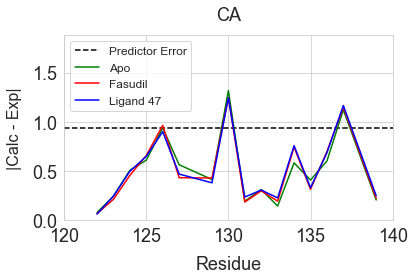

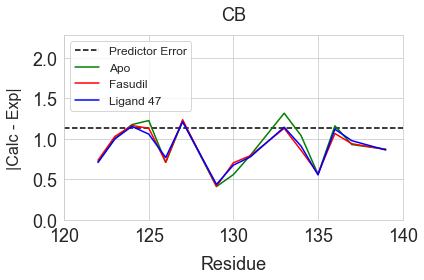

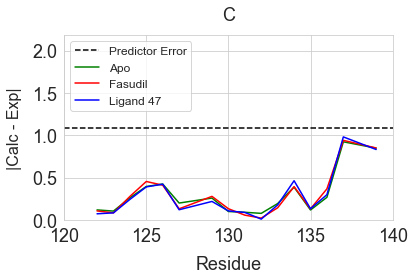

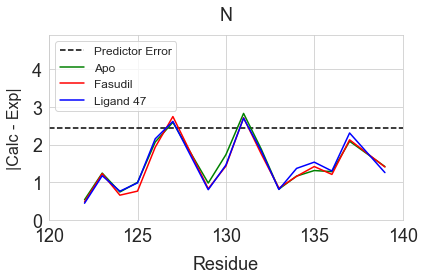

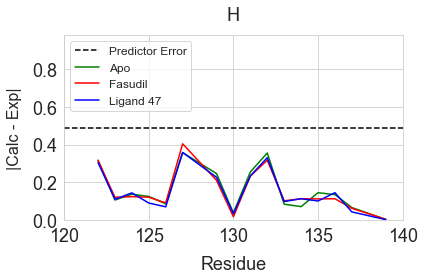

<Figure size 432x288 with 0 Axes>

In [14]:
#Compare Deviates
compare_data=['CA','CB','C','N','H']
predictor_error=[0.94,1.14,1.09,2.45,0.49]
err_d = { 'CA': 0.94,
          'CB': 1.14,
          'C':  1.09,
          'N':  2.45,
          'H': 0.49,
          'HA': 0.25}


for key in compare_data:   
 apo_comp=[]
 fas_comp=[]
 lig47_comp=[]
 exp_comp=[]
 resindex=[]
 for key2 in expdata[key]:
  if expdata[key][key2][0]!=0:  
   if key2 in apodata[key]:
    if apodata[key][key2][0]!=0:
     resindex.append(int(key2)) 
     apo_comp.append(apodata[key][key2])
     fas_comp.append(lig41data[key][key2])
     lig47_comp.append(lig47data[key][key2])
     exp_comp.append(expdata[key][key2])

 resindex=np.asarray(resindex)
 apo_comp=np.asarray(apo_comp)
 fas_comp=np.asarray(fas_comp)
 lig47_comp=np.asarray(lig47_comp)
 exp_comp=np.asarray(exp_comp)
 np.savetxt('%s/%s.Apo.dat'%(outdir,key),np.column_stack((resindex,apo_comp)))
 np.savetxt('%s/%s.fasudil.dat'%(outdir,key),np.column_stack((resindex,fas_comp)))
 np.savetxt('%s/%s.lig47.dat'%(outdir,key),np.column_stack((resindex,lig47_comp)))
 np.savetxt('%s/%s.exp.dat'%(outdir,key),np.column_stack((resindex,exp_comp)))
 pred_error=float(err_d[key])
 plt.plot([120,140],[pred_error,pred_error],linestyle='--',color='black',label='Predictor Error')
 plt.plot(resindex,np.absolute(apo_comp-exp_comp),color='green',label='Apo')
 plt.plot(resindex,np.absolute(fas_comp-exp_comp),color='red',label='Fasudil')
 plt.plot(resindex,np.absolute(lig47_comp-exp_comp),color='blue',label='Ligand 47')
 plt.title('%s'%key,size=18,pad=15.0)
 plt.ylabel('|Calc - Exp|',size='16',labelpad=10.0)
 plt.xticks(fontsize=18)
 plt.yticks(fontsize=18)
 plt.xticks([120,125,130,135,140],size='18')
 plt.yticks(size='18')
 plt.ylim(0,pred_error*2)
 plt.xlim(120,140)
 plt.xlabel('Residue',size=18,labelpad=10.0)
 plt.legend(loc='upper left',fontsize='12')
 plt.tight_layout() 
 plt.tick_params(labelsize=18)
 plt.savefig('%s/CompareDeviation.%s.pdf'%(outdir,key))
 plt.show()
 plt.clf()